In [19]:
import pandas as pd
import sys
import numpy as np

import scanpy as sc
import scanpy.external as sce

import matplotlib.pyplot as plt

import seaborn as sns

In [4]:
%matplotlib inline

In [59]:
godsnot_64 = [
    # "#000000",  # remove the black, as often, we have black colored annotation
    "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
    "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
    "#5A0007", "#809693", "#6A3A4C", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80",
    "#61615A", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9", "#B903AA", "#D16100",
    "#DDEFFF", "#000035", "#7B4F4B", "#A1C299", "#300018", "#0AA6D8", "#013349", "#00846F",
    "#372101", "#FFB500", "#C2FFED", "#A079BF", "#CC0744", "#C0B9B2", "#C2FF99", "#001E09",
    "#00489C", "#6F0062", "#0CBD66", "#EEC3FF", "#456D75", "#B77B68", "#7A87A1", "#788D66",
    "#885578", "#FAD09F", "#FF8A9A", "#D157A0", "#BEC459", "#456648", "#0086ED", "#886F4C",
    "#34362D", "#B4A8BD", "#00A6AA", "#452C2C", "#636375", "#A3C8C9", "#FF913F", "#938A81",
    "#575329", "#00FECF", "#B05B6F", "#8CD0FF", "#3B9700", "#04F757", "#C8A1A1", "#1E6E00",
    "#7900D7", "#A77500", "#6367A9", "#A05837", "#6B002C", "#772600", "#D790FF", "#9B9700",
    "#549E79", "#FFF69F", "#201625", "#72418F", "#BC23FF", "#99ADC0", "#3A2465", "#922329",
    "#5B4534", "#FDE8DC", "#404E55", "#0089A3", "#CB7E98", "#A4E804", "#324E72"]

In [5]:
sys.path.append("../../../datasets/") # script to read in data

from geo_read import geoREAD

In [6]:
geo = geoREAD('GSE118828_RAW.tar','../../../datasets/')

In [7]:
geo.gsm_files

['GSM3348303_553_Perit_S1.counts.umiCounts.aboveBackground.table.csv.gz',
 'GSM3348304_565_Cystadenoma_S1.counts.umiCounts.aboveBackground.table.csv.gz',
 'GSM3348305_589_Omentum_S1.counts.umiCounts.aboveBackground.table.csv.gz',
 'GSM3348306_618_Ovary_S1.counts.umiCounts.table.csv.gz',
 'GSM3348307_TB10040568_NORMAL_S1.counts.umiCounts.table.csv.gz',
 'GSM3348308_TB10040568_TUMOR_S1.counts.umiCounts.table.csv.gz',
 'GSM3348309_TB10040580_S1.counts.umiCounts.table.csv.gz',
 'GSM3348310_TB10040580met_S1_1_.counts.umiCounts.table.csv.gz',
 'GSM3348311_TB10040589_4_S1.counts.umiCounts.table.csv.gz',
 'GSM3348312_TB10040589met_S1.counts.umiCounts.table.csv.gz',
 'GSM3348313_TB10040600_CD31_S1.counts.umiCounts.table.csv.gz',
 'GSM3348314_TB10040600_NP-1_S1.counts.umiCounts.table.csv.gz',
 'GSM3348315_TB10040600_NP-2_S1.counts.umiCounts.table.csv.gz',
 'GSM3348316_TB10040600_Tumor_S1.counts.umiCounts.table.csv.gz',
 'GSM3348317_TB10040626_OMENTUM_S1.counts.umiCounts.table.csv.gz',
 'GSM33483

In [8]:
data_dict = {}
for i, d in enumerate(geo.gsm_files):
    
    data = geo.readGSM(d)
    
    data_dict[str(i)] = data

In [9]:
data_dict["1"]

,CellId,DDX11L1,WASH7P,MIR6859-3,MIR6859-2,MIR6859-4,MIR6859-1,MIR1302-11,MIR1302-9,MIR1302-2,...,DAZ1,DAZ3,DAZ2,TTTY3B,TTTY3,CDY1B,CDY1,CSPG4P1Y,GOLGA2P3Y,GOLGA2P2Y
0,cgagcagagtgacagact,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,agtaaaggattgccacgc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,caaccgatagcgtgaatt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,acccaactcaatgtggtg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,gagtgaccgatgtctagc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,ggacgaggacgagccgtt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
219,tgttcgtagaggcaccac,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
220,tttgggagcacgtagagg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
221,agtctggatcaagtcggc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
for d in data_dict:
    
    data_dict[d].set_index("CellId", inplace=True)
    
    data_dict[d].index = data_dict[d].index + "-" + d

In [11]:
data_dict["2"].head()

,DDX11L1,WASH7P,MIR6859-3,MIR6859-2,MIR6859-4,MIR6859-1,MIR1302-11,MIR1302-9,MIR1302-2,MIR1302-10,...,DAZ1,DAZ3,DAZ2,TTTY3B,TTTY3,CDY1B,CDY1,CSPG4P1Y,GOLGA2P3Y,GOLGA2P2Y
CellId,,,,,,,,,,,,,,,,,,,,,
aagccacttacgcgagca-2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
acccaataagctcgttat-2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
agatgtctaggtgaggcc-2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
agcacggtggtggcgaat-2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
agtaaacgttattcggga-2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df4_5 = pd.concat([data_dict["4"], data_dict["5"]], axis=0, join="outer")

df4_5.shape

(551, 26364)

In [13]:
data = df4_5.copy(deep=True)

adata = sc.AnnData(
        X=np.array(data),
        obs={'obs_names': data.index.astype(str)},
        var={'var_names': data.columns.values}
    )

In [14]:
adata

AnnData object with n_obs × n_vars = 551 × 26364 

In [15]:
patient_lst= [cell[-1] for cell in data.index.astype(str)]

len(patient_lst)

551

In [16]:
adata.obs["Patient"] = patient_lst

adata

AnnData object with n_obs × n_vars = 551 × 26364 
    obs: 'Patient'

In [17]:
# Molecules and reads
adata.obs["total_molecules"] = np.sum(adata.X, axis=1)

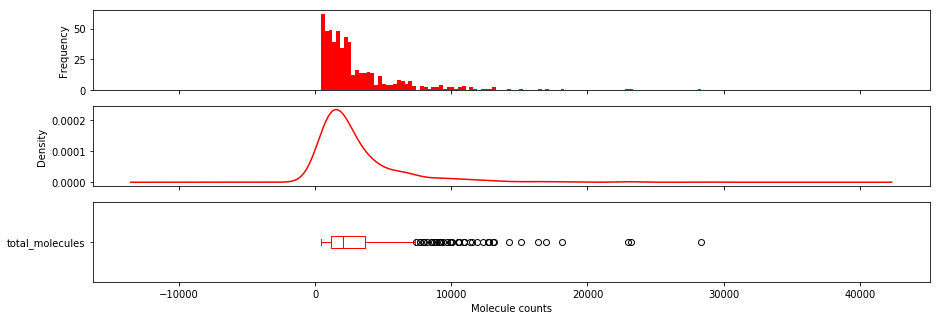

In [20]:
a = adata.copy()

# Per cell (Total molecules per cell)
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(15,5))

a.obs["total_molecules"][a.obs["total_molecules"] != 0].plot(kind="hist", bins=100, ax=ax1, color="r")
a.obs["total_molecules"][a.obs["total_molecules"] != 0].plot(kind="kde", ax=ax2, color="r")
a.obs["total_molecules"][a.obs["total_molecules"] != 0].plot(kind="box", vert=False, ax=ax3, color="r")

x = ax3.set_xlabel("Molecule counts")

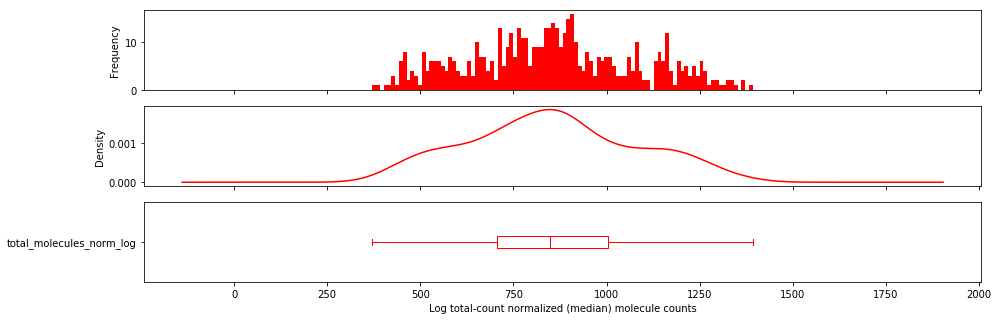

In [21]:
# Total count normalize to the median library size per sample
sc.pp.normalize_total(adata,
                                   target_sum=None,
                                   key_added="total_molecules",
                                   inplace=True)

# Logarithmize molecule counts
sc.pp.log1p(adata)

adata.obs["total_molecules_norm_log"] = np.sum(adata.X, axis=1)

a = adata
# Plot normalized and logaritmized counts
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(15,5))

a.obs["total_molecules_norm_log"][a.obs["total_molecules_norm_log"] != 0].plot(kind="hist", bins=100, ax=ax1, color="r")
a.obs["total_molecules_norm_log"][a.obs["total_molecules_norm_log"] != 0].plot(kind="kde", ax=ax2, color="r")
a.obs["total_molecules_norm_log"][a.obs["total_molecules_norm_log"] != 0].plot(kind="box", vert=False, ax=ax3, color="r")

x = ax3.set_xlabel("Log total-count normalized (median) molecule counts")

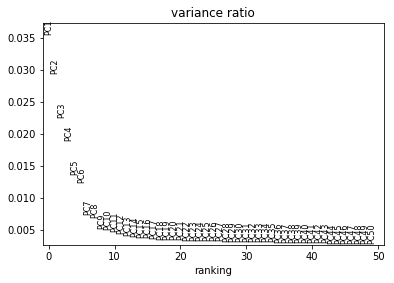

In [22]:
# Principal components
#rcParams['figure.figsize'] = (5, 5)

sc.tl.pca(adata, svd_solver='arpack')

sc.pl.pca_variance_ratio(adata, n_pcs=50, log=False, show=True)

In [23]:
# Computing the neighborhood graph
sc.pp.neighbors(
    adata,
    n_neighbors=15, # default
    n_pcs=50, # Let's use 50 PCs
    method="umap" # default
)

In [24]:
# Embedding the neighborhood graph
sc.tl.umap(adata)

In [25]:
adata.obs["Patient"] = adata.obs["Patient"].replace(["4","5"], ["Normal","Tumor"])

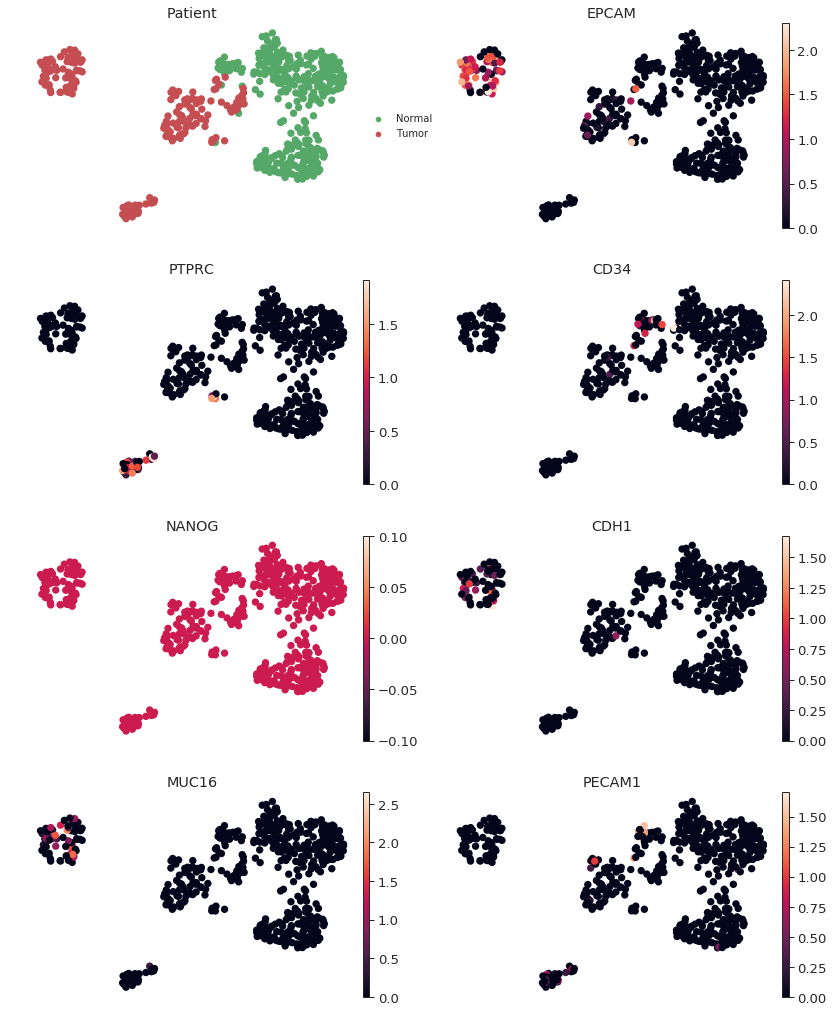

In [58]:
# Batches
#rcParams['figure.figsize'] = (5, 5)

sc.pl.umap(adata,
           color=["Patient", "EPCAM", "PTPRC", "CD34", "NANOG", "CDH1", "MUC16", "PECAM1"],
           use_raw=False, # Not relevant here
           ncols=2, 
           sort_order=False,
           palette=["g","r"],
           frameon=False,
           legend_fontsize = 10
)

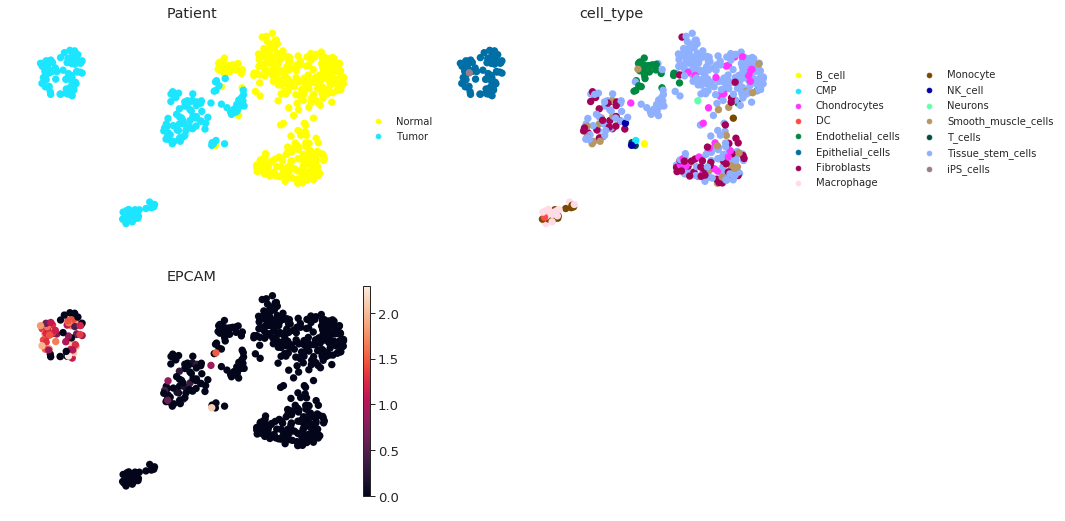

In [61]:
# Batches
#rcParams['figure.figsize'] = (5, 5)

sc.pl.umap(adata,
           color=["Patient", "cell_type", "EPCAM"],
           use_raw=False, # Not relevant here
           ncols=2, 
           sort_order=False,
           palette=godsnot_64,
           frameon=False,
           legend_fontsize = 10
)

In [27]:
CD34_DF = pd.DataFrame({
    "index": adata.obs.index,
    "CD34": adata[:, "CD34"].X
})

CD34_DF.head()

/home/ec2-user/.conda/envs/CA01_NY_scCanEvo/lib/python3.6/site-packages/anndata/core/anndata.py:846: FutureWarning: In anndata v0.7+, arrays contained within an AnnData object will maintain their dimensionality. For example, prior to v0.7 `adata[0, 0].X` returned a scalar and `adata[0, :]` returned a 1d array, post v0.7 they will return two dimensional arrays. If you would like to get a one dimensional array from your AnnData object, consider using the `adata.obs_vector`, `adata.var_vector` methods or accessing the array directly.
  warn_flatten()


,index,CD34
0,gcgcgggtcggctgcggt-4,0.0
1,aattgggaggcccgagca-4,0.0
2,cggcgtcgagcagccaga-4,0.0
3,agcacgggccattcggga-4,0.0
4,tcgcctcgagcacaccac-4,0.0


In [28]:
CD34_DF.sort_values(by="CD34", ascending=False)

,index,CD34
249,cgagcagccagattcgca-4,2.415278
226,gccgttgaaggggagctt-4,2.091205
308,ggccataacgtgacggac-4,1.481830
518,agatgtcttacggggatc-5,1.297287
516,taagctgccagactatta-5,1.287986
...,...,...
180,ttggatggccatatccgg-4,0.000000
179,tagagggcttgtgtccta-4,0.000000
178,acggacatccggtgcggt-4,0.000000
177,ctgtggtaatagtggcag-4,0.000000


In [33]:
sys.path.append("../packages/Palantir/src/")

import palantir

In [35]:
# cnav

In [34]:
d = sce.tl.palantir(adata, normalize=True, log_transform=True, filter_low=False, inplace=True)


Determing nearest neighbor graph...


KeyboardInterrupt: 

In [ ]:
adata

In [ ]:
adata.uns["palantir_tsne"].head()

In [ ]:
c = list(adata.obs["Patient"].replace(["4","5"], ["r","g"]).values)

In [ ]:
len(c)

In [ ]:
c[:4]

In [ ]:
adata.uns["palantir_tsne"]

In [ ]:
ax = sns.scatterplot(data=adata.uns["palantir_tsne"], x="x", y="y")

In [ ]:
adata.uns["palantir_tsne"].plot(kind="scatter", x="x", y="y")

In [ ]:
adata2_r2 = adata1_sub[~adata2_r1.obs["phenos"].isin(Remove_phenos)][:, adata2_r1.var.index]


In [ ]:
adata[adata.obs["Patient"]=="4"].uns["palantir_tsne"].plot(kind="scatter", x="x", y="y", c="b")

In [ ]:
adata[adata.obs["Patient"]=="4"]#.uns["palantir_tsne"]

In [ ]:
adata[adata.obs["Patient"]=="4"].uns["palantir_tsne"].plot(kind="scatter", x="x", y="y")

In [ ]:
adata.uns["palantir_diff_maps"]

In [ ]:
ax = sns.scatterplot(data=adata.uns["palantir_diff_maps"], x="x", y="y")

In [ ]:
adata

In [ ]:
adata.uns["palantir_imp_df"]

In [ ]:
palantir

In [ ]:
ax = sns.scatterplot(data=adata.uns["palantir_diff_maps"]["EigenVectors"], x=1, y=2)

### out of scanpy

In [ ]:

import palantir

# Plotting and miscellaneous imports
import os
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
data.head()

In [ ]:
counts = df4_5.copy(deep=True)

In [ ]:
fig, ax = palantir.plot.plot_molecules_per_cell_and_gene(counts+1)


In [ ]:
filtered_counts = palantir.preprocess.filter_counts_data(counts, cell_min_molecules=1000, genes_min_cells=10)

In [ ]:
filtered_counts.shape

In [ ]:
norm_df = palantir.preprocess.normalize_counts(counts)


In [ ]:
norm_df = palantir.preprocess.log_transform(norm_df)


In [ ]:
pca_projections, _ = palantir.utils.run_pca(norm_df)


In [ ]:
# Run diffusion maps
dm_res = palantir.utils.run_diffusion_maps(pca_projections, n_components=5)


In [ ]:
ms_data = palantir.utils.determine_multiscale_space(dm_res)


In [ ]:
tsne = palantir.utils.run_tsne(ms_data)


In [ ]:
fig, ax = palantir.plot.plot_tsne(tsne)


In [ ]:
fig, ax = palantir.plot.plot_tsne_by_cell_sizes(counts, tsne)


In [ ]:
imp_df = palantir.utils.run_magic_imputation(norm_df, dm_res)


In [ ]:
palantir.plot.plot_gene_expression(imp_df, tsne, ['CD34', 'MPO', 'GATA1', 'IRF8', "PTPRC", "EPCAM", "MUC16"])


In [ ]:
palantir.plot.plot_diffusion_components(tsne, dm_res)


In [ ]:
start_cell = 'cgagcagccagattcgca-4'
pr_res = palantir.core.run_palantir(ms_data, start_cell, num_waypoints=500)

In [ ]:
palantir.plot.plot_palantir_results(pr_res, tsne)


In [39]:
adata.X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [36]:
import sys

sys.path.insert(0, "/home/ec2-user/softwear/CNV_infer/")

from inferCNVFast import infer_cnv

In [40]:
a = adata.copy()

data_df = pd.DataFrame(a.X, index=a.obs_names, columns=a.var_names)

In [41]:
species="human"

if species == "human":
    
    genePosFile = "/home/ec2-user/softwear/CNV_infer/genePos.txt"
    chrFile = "/home/ec2-user/softwear/CNV_infer/chrNameLength.txt"    
    
elif species == "mouse":
    
    genePosFile = "/home/ec2-user/softwear/CNV_infer/genePos.mm10.txt"
    chrFile = "/home/ec2-user/softwear/CNV_infer/chrNameLength.mm10.txt"

else:
    raise("ValueError")

cnv_df = infer_cnv(genePosFile,
                   chrFile,
                   data_df,
                   narounds=100,
                   species=species)

Number of around bins/genes to be taken in account: 100
Moving average by genes
Missing genes if any:
6752
starting moving average to infer cnv
done moving average to infer cnv
19612
19528
* median non-zero values: 0.041324701848602235
* 5-percentile of non-zero values: 0.012077811938613209
* 95-percentile of non-zero values: 0.07937354857648783


In [42]:
adata

AnnData object with n_obs × n_vars = 551 × 26364 
    obs: 'Patient', 'total_molecules', 'total_molecules_norm_log'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'Patient_colors', 'palantir_norm_data', 'palantir_pca_results', 'palantir_diff_maps', 'palantir_ms_data'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [46]:
!ls ~/git_repos/Understand-cancer-evolution-through-single-cell-expression-dynamics/presentations/examples/

GSM3348307_GSM3348308_barcode2celltype.tsv  pseudotime_combined_5and6.rds
OVC_combined_heatmap.tiff		    pseudotime_normal.rds
OVC_combined_slingshot_trajectory.tiff	    pseudotime_tumor_6.rds


In [48]:
PATH = "~/git_repos/Understand-cancer-evolution-through-single-cell-expression-dynamics/presentations/examples/"

In [54]:
cell_types = pd.read_csv(PATH + "GSM3348307_GSM3348308_barcode2celltype.tsv", sep="\t")

cell_types.tail()

,BARCODE,CELL.TYPE
546,gatcaagcttgtcgttat,Epithelial_cells
547,ggattggatcaagagtga,Epithelial_cells
548,cactgttgcggtaattgg,Epithelial_cells
549,tctagcgatcaacactgt,Epithelial_cells
550,ggacgacgaaagactgca,Epithelial_cells


In [50]:
cell_types["CELL.TYPE"].value_counts()

Tissue_stem_cells      284
Epithelial_cells        72
Fibroblasts             61
Chondrocytes            35
Endothelial_cells       31
Smooth_muscle_cells     30
Macrophage              16
Monocyte                12
NK_cell                  3
T_cells                  2
Neurons                  1
DC                       1
B_cell                   1
CMP                      1
iPS_cells                1
Name: CELL.TYPE, dtype: int64

In [53]:
adata.obs_names

Index(['gcgcgggtcggctgcggt-4', 'aattgggaggcccgagca-4', 'cggcgtcgagcagccaga-4',
       'agcacgggccattcggga-4', 'tcgcctcgagcacaccac-4', 'atacttcaggaggagctt-4',
       'tttgggaacgtggagctt-4', 'gtggtgtcatcaggtagg-4', 'agcacgctattatcatca-4',
       'catagaccgatggcgcgg-4',
       ...
       'taatagttgctctgtgta-5', 'tgagaccctctagatcaa-5', 'ctaggttgttcgctaggt-5',
       'tagagggccagaattagt-5', 'ctaggtcactgtccgtaa-5', 'gatcaagcttgtcgttat-5',
       'ggattggatcaagagtga-5', 'cactgttgcggtaattgg-5', 'tctagcgatcaacactgt-5',
       'ggacgacgaaagactgca-5'],
      dtype='object', name='CellId', length=551)

In [62]:
adata.obs["cell_type"] = list(cell_types["CELL.TYPE"])

adata.obs["cell_type"].value_counts()

Tissue_stem_cells      284
Epithelial_cells        72
Fibroblasts             61
Chondrocytes            35
Endothelial_cells       31
Smooth_muscle_cells     30
Macrophage              16
Monocyte                12
NK_cell                  3
T_cells                  2
Neurons                  1
DC                       1
B_cell                   1
CMP                      1
iPS_cells                1
Name: cell_type, dtype: int64

In [63]:
normal_cells = adata[adata.obs["cell_type"] ==
                                "Macrophage"].obs.index

normal_cells

Index(['tgcggttagaggattagt-4', 'cggcgtaattggcagact-5', 'gaagggggtagggcgaat-5',
       'caaccgacccaacggcgt-5', 'tcgccttaccgatcggga-5', 'gcgcgggactcgcaccac-5',
       'tgctaagaggcccgagca-5', 'ccacgctgagaccaagtc-5', 'ttggatggtgcttcatca-5',
       'gtcctacttgaactgtgg-5', 'gtcggctgagactgcggt-5', 'aattggtgctaagcgcgg-5',
       'aagccacctctaatgaag-5', 'agacccagcacgtcggga-5', 'gtggtgacaagggtggtg-5',
       'gagcttgccgtttcagtg-5'],
      dtype='object', name='CellId')

In [64]:
a = adata.copy()

a_normal_cells = a[a.obs["cell_type"] == "Macrophage"].obs.index

norm_mean = cnv_df.loc[normal_cells].mean(axis=0)
norm_std = cnv_df.loc[normal_cells].std(axis=0)

cnv_df_batch = cnv_df.loc[a.obs.index]
        
cnvs = cnv_df_batch.subtract(norm_mean, axis=1).div(norm_std,
                                                                 axis=1)


In [65]:
cnvs.shape

(551, 19528)

In [67]:
type(cnvs)

pandas.core.frame.DataFrame

In [68]:
adata.obs["CNV_inference"] = cnvs.std(axis=1)


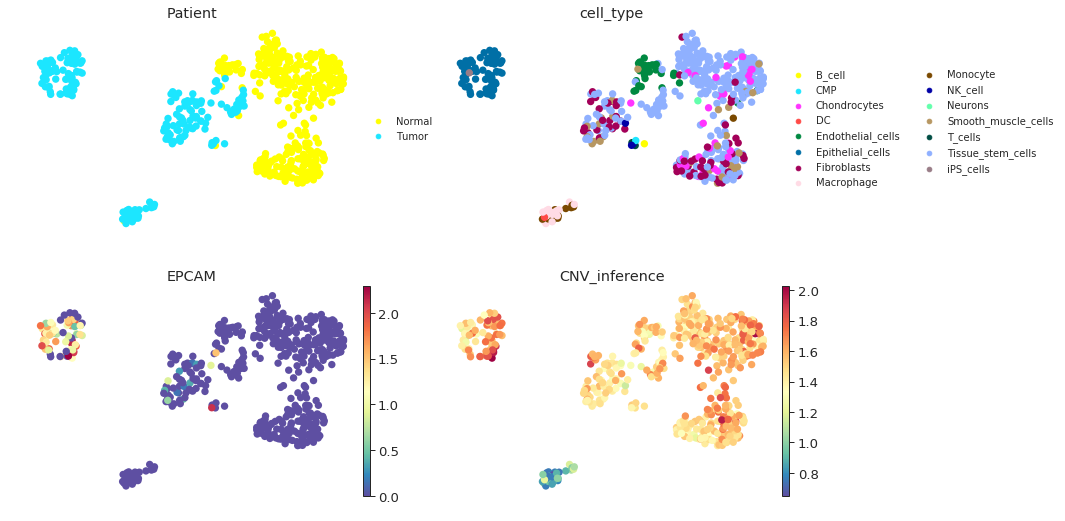

In [84]:
# Batches
#rcParams['figure.figsize'] = (5, 5)

sc.pl.umap(adata,
           color=["Patient", "cell_type", "EPCAM", "CNV_inference"],
           use_raw=False, # Not relevant here
           ncols=2, 
           sort_order=False,
           palette=godsnot_64,
           frameon=False,
           legend_fontsize = 10,
           cmap="Spectral_r"
)

In [72]:
CNV_inference = adata.obs["CNV_inference"]

In [74]:
CNV_inference = pd.DataFrame(CNV_inference)

In [80]:
!ls ~/git_repos/Understand-cancer-evolution-through-single-cell-expression-dynamics/presentations/examples

GSM3348307_GSM3348308_barcode2celltype.tsv  pseudotime_combined_5and6.rds
OVC_combined_heatmap.tiff		    pseudotime_normal.rds
OVC_combined_slingshot_trajectory.tiff	    pseudotime_tumor_6.rds


In [81]:
PATH = "~/git_repos/Understand-cancer-evolution-through-single-cell-expression-dynamics/presentations/examples"

In [83]:
CNV_inference.to_csv(PATH + "CNV_inference.tsv", sep="\t", index=True)

In [86]:
# Calculate leiden
sc.tl.leiden(adata, resolution=1)

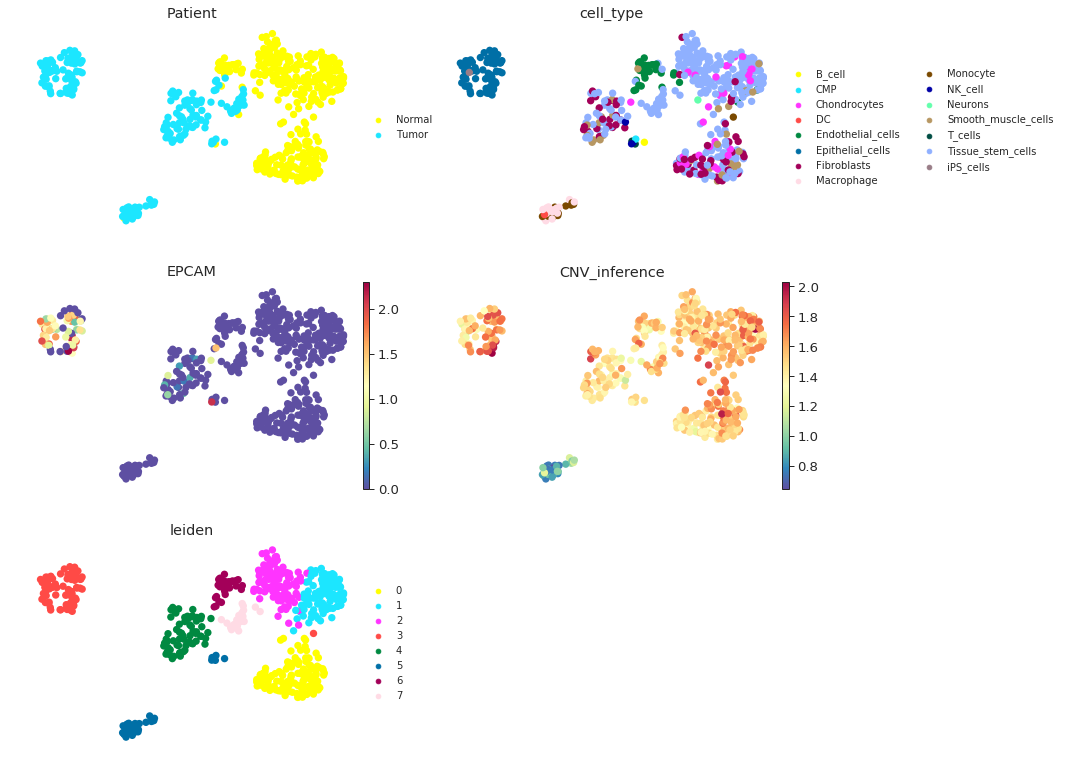

In [87]:
# Batches
#rcParams['figure.figsize'] = (5, 5)

sc.pl.umap(adata,
           color=["Patient", "cell_type", "EPCAM", "CNV_inference", "leiden"],
           use_raw=False, # Not relevant here
           ncols=2, 
           sort_order=False,
           palette=godsnot_64,
           frameon=False,
           legend_fontsize = 10,
           cmap="Spectral_r"
)

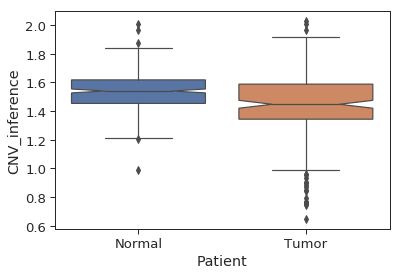

In [89]:
d = adata.obs[["Patient", "CNV_inference"]]

sns.boxplot(data=d, x="Patient", y="CNV_inference", notch=True)

In [ ]:
from matplotlib import rcParams


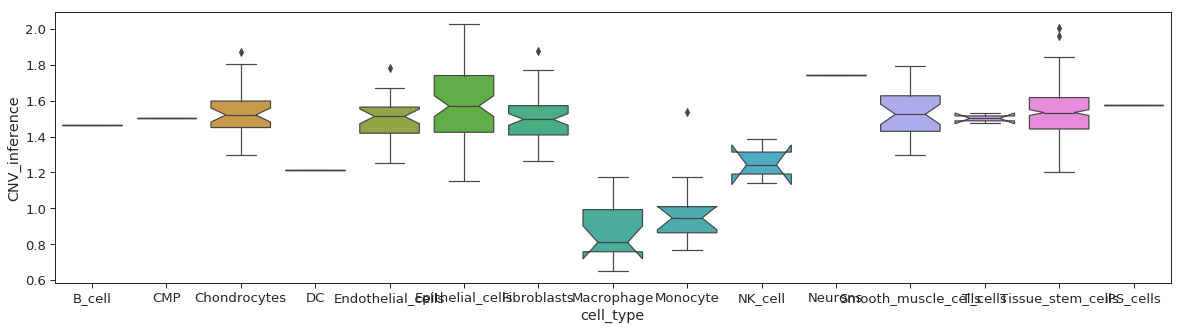

In [96]:
rcParams['figure.figsize'] = (20, 5)

d = adata.obs[["cell_type", "CNV_inference"]]

sns.boxplot(data=d, x="cell_type", y="CNV_inference", notch=True, orient="v")

In [99]:
d = adata.obs[["cell_type", "CNV_inference"]]
d.sort_values(by="CNV_inference")

order = []
for c in d.sort_values(by="CNV_inference")["cell_type"]:
    
    if c not in order:
        order.append(c)

order

['Macrophage',
 'Monocyte',
 'NK_cell',
 'Epithelial_cells',
 'Tissue_stem_cells',
 'DC',
 'Endothelial_cells',
 'Fibroblasts',
 'Chondrocytes',
 'Smooth_muscle_cells',
 'B_cell',
 'T_cells',
 'CMP',
 'iPS_cells',
 'Neurons']

In [100]:
order_m = []
for c in order:
    
    m = d[d["cell_type"]==c]["CNV_inference"].median()
    
    order_m.append((c, m))

In [101]:
order_m

[('Macrophage', 0.8094607751896616),
 ('Monocyte', 0.94561723307286),
 ('NK_cell', 1.2426655174014178),
 ('Epithelial_cells', 1.5697784574854756),
 ('Tissue_stem_cells', 1.5338651189387011),
 ('DC', 1.214933131870734),
 ('Endothelial_cells', 1.5127140013842648),
 ('Fibroblasts', 1.4957068077570954),
 ('Chondrocytes', 1.520325256400293),
 ('Smooth_muscle_cells', 1.5242468756763077),
 ('B_cell', 1.465747402043218),
 ('T_cells', 1.5014444089607748),
 ('CMP', 1.5010133039354556),
 ('iPS_cells', 1.5776307743071647),
 ('Neurons', 1.7411816746535742)]

In [102]:
o2 = sorted(order_m, key = lambda x: x[1])

o2

[('Macrophage', 0.8094607751896616),
 ('Monocyte', 0.94561723307286),
 ('DC', 1.214933131870734),
 ('NK_cell', 1.2426655174014178),
 ('B_cell', 1.465747402043218),
 ('Fibroblasts', 1.4957068077570954),
 ('CMP', 1.5010133039354556),
 ('T_cells', 1.5014444089607748),
 ('Endothelial_cells', 1.5127140013842648),
 ('Chondrocytes', 1.520325256400293),
 ('Smooth_muscle_cells', 1.5242468756763077),
 ('Tissue_stem_cells', 1.5338651189387011),
 ('Epithelial_cells', 1.5697784574854756),
 ('iPS_cells', 1.5776307743071647),
 ('Neurons', 1.7411816746535742)]

In [103]:
o3 = []
for t in o2:
    
    o3.append(t[0])
    
o3

['Macrophage',
 'Monocyte',
 'DC',
 'NK_cell',
 'B_cell',
 'Fibroblasts',
 'CMP',
 'T_cells',
 'Endothelial_cells',
 'Chondrocytes',
 'Smooth_muscle_cells',
 'Tissue_stem_cells',
 'Epithelial_cells',
 'iPS_cells',
 'Neurons']

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

/home/ec2-user/.conda/envs/CA01_NY_scCanEvo/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


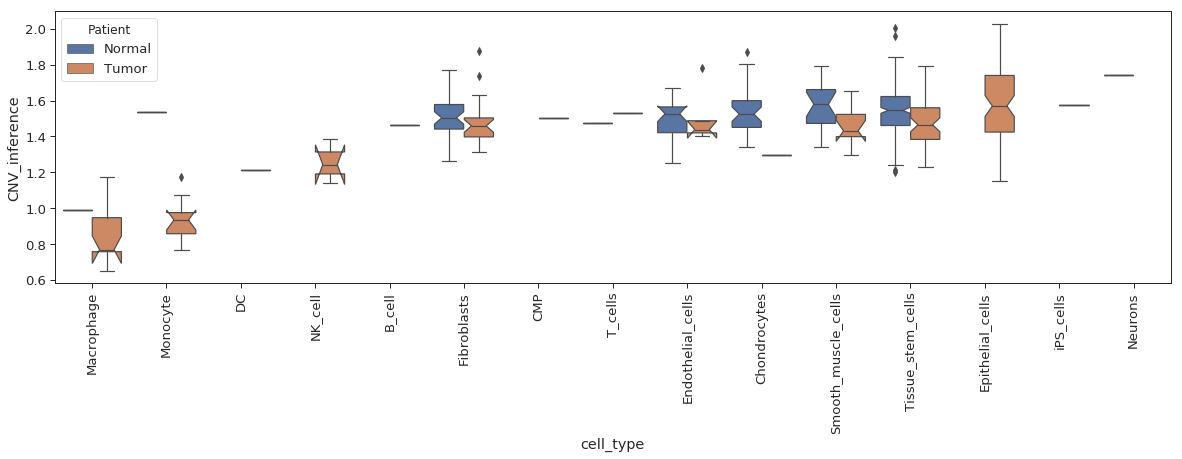

In [107]:
rcParams['figure.figsize'] = (20, 5)

d = adata.obs[["cell_type", "CNV_inference", "Patient"]]

ax = sns.boxplot(data=d, x="cell_type", y="CNV_inference", hue="Patient", notch=True, orient="v", order=o3)

plt.setp(ax.get_xticklabels(), rotation=90)
